In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Questions

1. How have the basic stats (ie. 3-point FGs attempted, winning percentage, etc.) of NBA teams changed over the past decade? **[Ryan]**

2. Playoff team data vs Non-playoff team data over past decade? Or more generally speaking, differences between winning and non-winning teams (which variables are most correlated)? **[Chris]**

3. What variable has the highest correlation with winning percentage among teams in the top 25% over the past decade? Is there a significant difference with this variable between the top 25% and bottom 25%? **[Jovanni]**

# Final Project: NBA Quick Stats

In [71]:
team_name_map = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "NJN",
    "Charlotte Bobcats": "CHA",
    "Charlotte Hornets": "CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Hornets": "NOH",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

In [72]:
def team_specific_data(team, year):
    if team.startswith("Chicago Bulls"):
        print(f"Working on {year} {team}")
    
    if team.endswith('*'):
        team = team[:-1]
    
    team_abbrev = team_name_map[team]
    url = f"https://www.basketball-reference.com/teams/{team_abbrev}/{year}.html"
   
    # Basic data: team players with most pts & ast
    table_basic = pd.read_html(url, match='PTS/G')[0]
    table_basic = table_basic[table_basic['MP'] >= 15]
    pts_list = list(table_basic['PTS/G'].sort_values(ascending=False))
    ast_list = list(table_basic['AST'].sort_values(ascending=False))
    
    best_pts = pts_list[0]
    top_pts_sum = sum(pts_list[:3])
    best_ast = ast_list[0]
    top_ast_sum = sum(ast_list[:3])

    # More adv. data: team players with best PERs, ages
    table_adv = pd.read_html(url, match='PER')[0]
    table_adv['min_per_game'] = table_adv['MP'] / table_adv['G']
    table_adv = table_adv[table_adv['min_per_game'] >= 15]
    
    per_list = list(table_adv['PER'].sort_values(ascending=False))
    top_per_list = per_list[:3]
    age_list = list(table_adv['Age'])

    best_per = per_list[0]
    top_per_avg = sum(top_per_list) / len(top_per_list)
    avg_age = sum(age_list) / len(age_list)
    
    return pd.Series([
        best_pts, top_pts_sum, best_ast, top_ast_sum,
        best_per, round(top_per_avg, 2), round(avg_age, 2)
    ])

In [73]:
def compute_summary_stats(year):
    url = f"https://www.basketball-reference.com/leagues/NBA_{year}.html"
    tables = pd.read_html(url)
    
    east = tables[0].iloc[:,[0, 3]]
    east.rename(columns={'Eastern Conference': 'Team'}, inplace=True)
    east['Region'] = 'East'
    
    west = tables[1].iloc[:,[0, 3]]
    west.rename(columns={'Western Conference': 'Team'}, inplace=True)
    west['Region'] = 'West'
    
    all_teams = [east, west]
    all_teams = pd.concat(all_teams)
    all_teams = all_teams.reset_index()
    all_teams.drop('index', axis=1, inplace=True)
    
    if year >= 2016:
        df_total = tables[4].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['3P_Rate'] = df_total['3PA'] / df_total['FGA']
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))
    else:
        df_total = tables[2].sort_values('PTS')
        df_total = df_total.merge(all_teams).sort_values('W/L%')
        df_total['Year'] = year
        df_total['3P_Rate'] = df_total['3PA'] / df_total['FGA']
        df_total['W/L%'] = pd.to_numeric(df_total['W/L%'])
        df_total['TopTeamThisYear?'] = (df_total['W/L%'] >= df_total['W/L%'].quantile(0.75))
        return pd.DataFrame(df_total.sort_values('W/L%', ascending=False))

In [74]:
# nba_data = []

# for year in range(2012, 2022):
#     print(f"Working on year {year}")
#     nba_data.append(compute_summary_stats(year))
    
# nba_data = pd.concat(nba_data)
# nba_data

In [75]:
# new_cols = ['best_pts', 'top_pts_sum', 'best_ast', 'top_ast_sum',
#             'best_per','top_per_avg', 'age']
# nba_data[new_cols] = nba_data.apply(
#     lambda row : team_specific_data(row['Team'], row['Year']),
#     axis=1
# )

In [76]:
# nba_data['best_pts_scaled'] = nba_data['best_pts'] / nba_data['PTS']
# nba_data['top_pts_sum_scaled'] = nba_data['top_pts_sum'] / nba_data['PTS']
# nba_data['best_ast_scaled'] = nba_data['best_ast'] / nba_data['AST']
# nba_data['top_ast_sum_scaled'] = nba_data['top_ast_sum'] / nba_data['AST']
# nba_data.head()

In [77]:
# new_file = '/Users/christopher_song/Desktop/fall_2021/stat_303_1/stat-303-1-project/data/nba_data.csv'
# nba_data.to_csv(new_file)

In [78]:
fp = '/Users/christopher_song/Desktop/fall_2021/stat_303_1/stat-303-1-project/data/nba_data.csv'
nba_data = pd.read_csv(fp)
nba_data.head()

,Unnamed: 0,Unnamed: 0.1,Rk,Team,G,MP,FG,FGA,FG%,3P,...,top_ast_sum,best_per,top_per_avg,age,Year_Bin,Status,best_pts_scaled,top_pts_sum_scaled,best_ast_scaled,top_ast_sum_scaled
0,0,12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,...,15.0,23.0,20.77,27.44,2012-2014,Playoffs,0.226376,0.541018,0.341991,0.649351
1,1,28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,...,14.5,24.1,22.87,28.00,2012-2014,Playoffs,0.176471,0.449373,0.331897,0.625000
2,2,27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,...,12.7,26.2,23.40,26.00,2012-2014,Playoffs,0.271581,0.663434,0.297297,0.686486
3,3,23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,...,14.3,30.7,25.30,28.50,2012-2014,Playoffs,0.275127,0.682234,0.310000,0.715000
4,4,17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,...,10.1,19.3,18.57,26.67,2012-2014,Playoffs,0.191402,0.453429,0.258065,0.543011


# Part 2

## Playoff Team Data vs. Non-Playoff Team Data

In [79]:
nba_data['Year_Bin'] = pd.cut(nba_data['Year'], [2011.5, 2014.5, 2017.5, 2021.5], 
                              labels=['2012-2014', '2015-2017', '2018-2021'])

playoff_data = nba_data[nba_data['Team'].str.endswith('*')]
playoff_data['Status'] = 'Playoffs'

lottery_data = nba_data[~nba_data['Team'].str.endswith('*')]
lottery_data['Status'] = 'Lottery'

nba_data = pd.concat([playoff_data, lottery_data])

display(playoff_data.head())
display(lottery_data.head())

,Unnamed: 0,Unnamed: 0.1,Rk,Team,G,MP,FG,FGA,FG%,3P,...,top_ast_sum,best_per,top_per_avg,age,Year_Bin,Status,best_pts_scaled,top_pts_sum_scaled,best_ast_scaled,top_ast_sum_scaled
0,0,12,18.0,Chicago Bulls*,66,241.5,37.4,82.8,0.452,6.3,...,15.0,23.0,20.77,27.44,2012-2014,Playoffs,0.226376,0.541018,0.341991,0.649351
1,1,28,2.0,San Antonio Spurs*,66,241.5,39.6,82.8,0.478,8.4,...,14.5,24.1,22.87,28.00,2012-2014,Playoffs,0.176471,0.449373,0.331897,0.625000
2,2,27,3.0,Oklahoma City Thunder*,66,242.3,37.3,79.2,0.471,7.2,...,12.7,26.2,23.40,26.00,2012-2014,Playoffs,0.271581,0.663434,0.297297,0.686486
3,3,23,7.0,Miami Heat*,66,243.0,37.1,79.0,0.469,5.6,...,14.3,30.7,25.30,28.50,2012-2014,Playoffs,0.275127,0.682234,0.310000,0.715000
4,4,17,13.0,Indiana Pacers*,66,242.3,35.7,81.4,0.438,5.9,...,10.1,19.3,18.57,26.67,2012-2014,Playoffs,0.191402,0.453429,0.258065,0.543011


,Unnamed: 0,Unnamed: 0.1,Rk,Team,G,MP,FG,FGA,FG%,3P,...,top_ast_sum,best_per,top_per_avg,age,Year_Bin,Status,best_pts_scaled,top_pts_sum_scaled,best_ast_scaled,top_ast_sum_scaled
160,16,21,9.0,Houston Rockets,66,243.4,37.7,84.0,0.449,7.2,...,14.7,19.6,18.80,26.73,2012-2014,Lottery,0.174312,0.478084,0.309859,0.690141
161,17,22,8.0,Phoenix Suns,66,240.0,37.8,82.5,0.458,6.7,...,14.6,21.2,18.97,29.62,2012-2014,Lottery,0.156504,0.412602,0.475556,0.648889
162,18,25,5.0,Milwaukee Bucks,66,240.4,37.9,85.6,0.443,6.6,...,15.2,20.5,19.23,27.17,2012-2014,Lottery,0.192929,0.509091,0.251064,0.646809
163,19,14,16.0,Portland Trail Blazers,66,241.9,36.4,82.1,0.443,7.2,...,13.5,22.7,20.07,28.55,2012-2014,Lottery,0.223251,0.522634,0.318627,0.661765
164,20,20,10.0,Minnesota Timberwolves,66,241.5,35.7,82.3,0.433,7.2,...,18.7,25.4,21.47,24.38,2012-2014,Lottery,0.265577,0.531154,0.420513,0.958974


In [80]:
focus_cols = ['best_pts_scaled', 'top_pts_sum_scaled', 'best_ast_scaled', 'top_ast_sum_scaled',
              'age', 'best_per', 'top_per_avg', 'FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 
              'FTA', 'FT%', 'ORB', 'DRB','TRB', 'AST', 'PTS', '3P_Rate', 'Year_Bin', 'Status']

In [81]:
overall_summary = nba_data[focus_cols].groupby(['Year_Bin', 'Status']).mean()
overall_summary

best_pts_scaled  top_pts_sum_scaled  best_ast_scaled  \
Year_Bin  Status                                                           
2012-2014 Lottery          0.195570            0.506166         0.324634   
          Playoffs         0.214722            0.535663         0.304457   
2015-2017 Lottery          0.204021            0.518884         0.296267   
          Playoffs         0.215469            0.527251         0.309108   
2018-2021 Lottery          0.205419            0.520222         0.269313   
          Playoffs         0.222384            0.541227         0.293467   

                    top_ast_sum_scaled        age   best_per  top_per_avg  \
Year_Bin  Status                                                            
2012-2014 Lottery             0.693597  26.064048  20.778571    18.784286   
          Playoffs            0.654630  27.791875  22.868750    20.423125   
2015-2017 Lottery             0.670402  25.939048  22.047619    19.475714   
          Playoffs            0.650481  27.582708  24.281250    21.148750   
2018-2021 Lottery             0.636324  25.695714  22.053571    19.785536   
          Playoffs            0.645750  27.155937  25.139063    21.690469   

                          FGA       FG%        3PA  ...        2PA       2P%  \
Year_Bin  Status                                    ...                        
2012-2014 Lottery   82.840476  0.443143  19.347619  ...  63.495238  0.472476   
          Playoffs  81.550000  0.459500  20.502083  ...  61.047917  0.492542   
2015-2017 Lottery   84.678571  0.445500  23.261905  ...  61.426190  0.483833   
          Playoffs  84.375000  0.459188  25.581250  ...  58.791667  0.502500   
2018-2021 Lottery   88.351786  0.454571  31.928571  ...  56.421429  0.512286   
          Playoffs  87.925000  0.467891  32.879687  ...  55.035938  0.529281   

                          FTA       FT%        ORB        DRB        TRB  \
Year_Bin  Status                                                           
2012-2014 Lottery   22.250000  0.754238  11.459524  30.471429  41.916667   
          Playoffs  23.185417  0.754542  10.885417  31.847917  42.737500   
2015-2017 Lottery   22.895238  0.755833  10.604762  32.726190  43.340476   
          Playoffs  23.285417  0.763917  10.368750  33.318750  43.687500   
2018-2021 Lottery   22.225000  0.761857  10.050000  33.758929  43.803571   
          Playoffs  22.581250  0.779641   9.950000  35.062500  45.004688   

                          AST         PTS   3P_Rate  
Year_Bin  Status                                     
2012-2014 Lottery   21.197619   96.895238  0.233213  
          Playoffs  22.152083   99.845833  0.251577  
2015-2017 Lottery   21.657143  100.790476  0.274415  
          Playoffs  22.885417  104.477083  0.302841  
2018-2021 Lottery   24.112500  108.526786  0.361246  
          Playoffs  24.367188  111.903125  0.373739  

[6 rows x 21 columns]

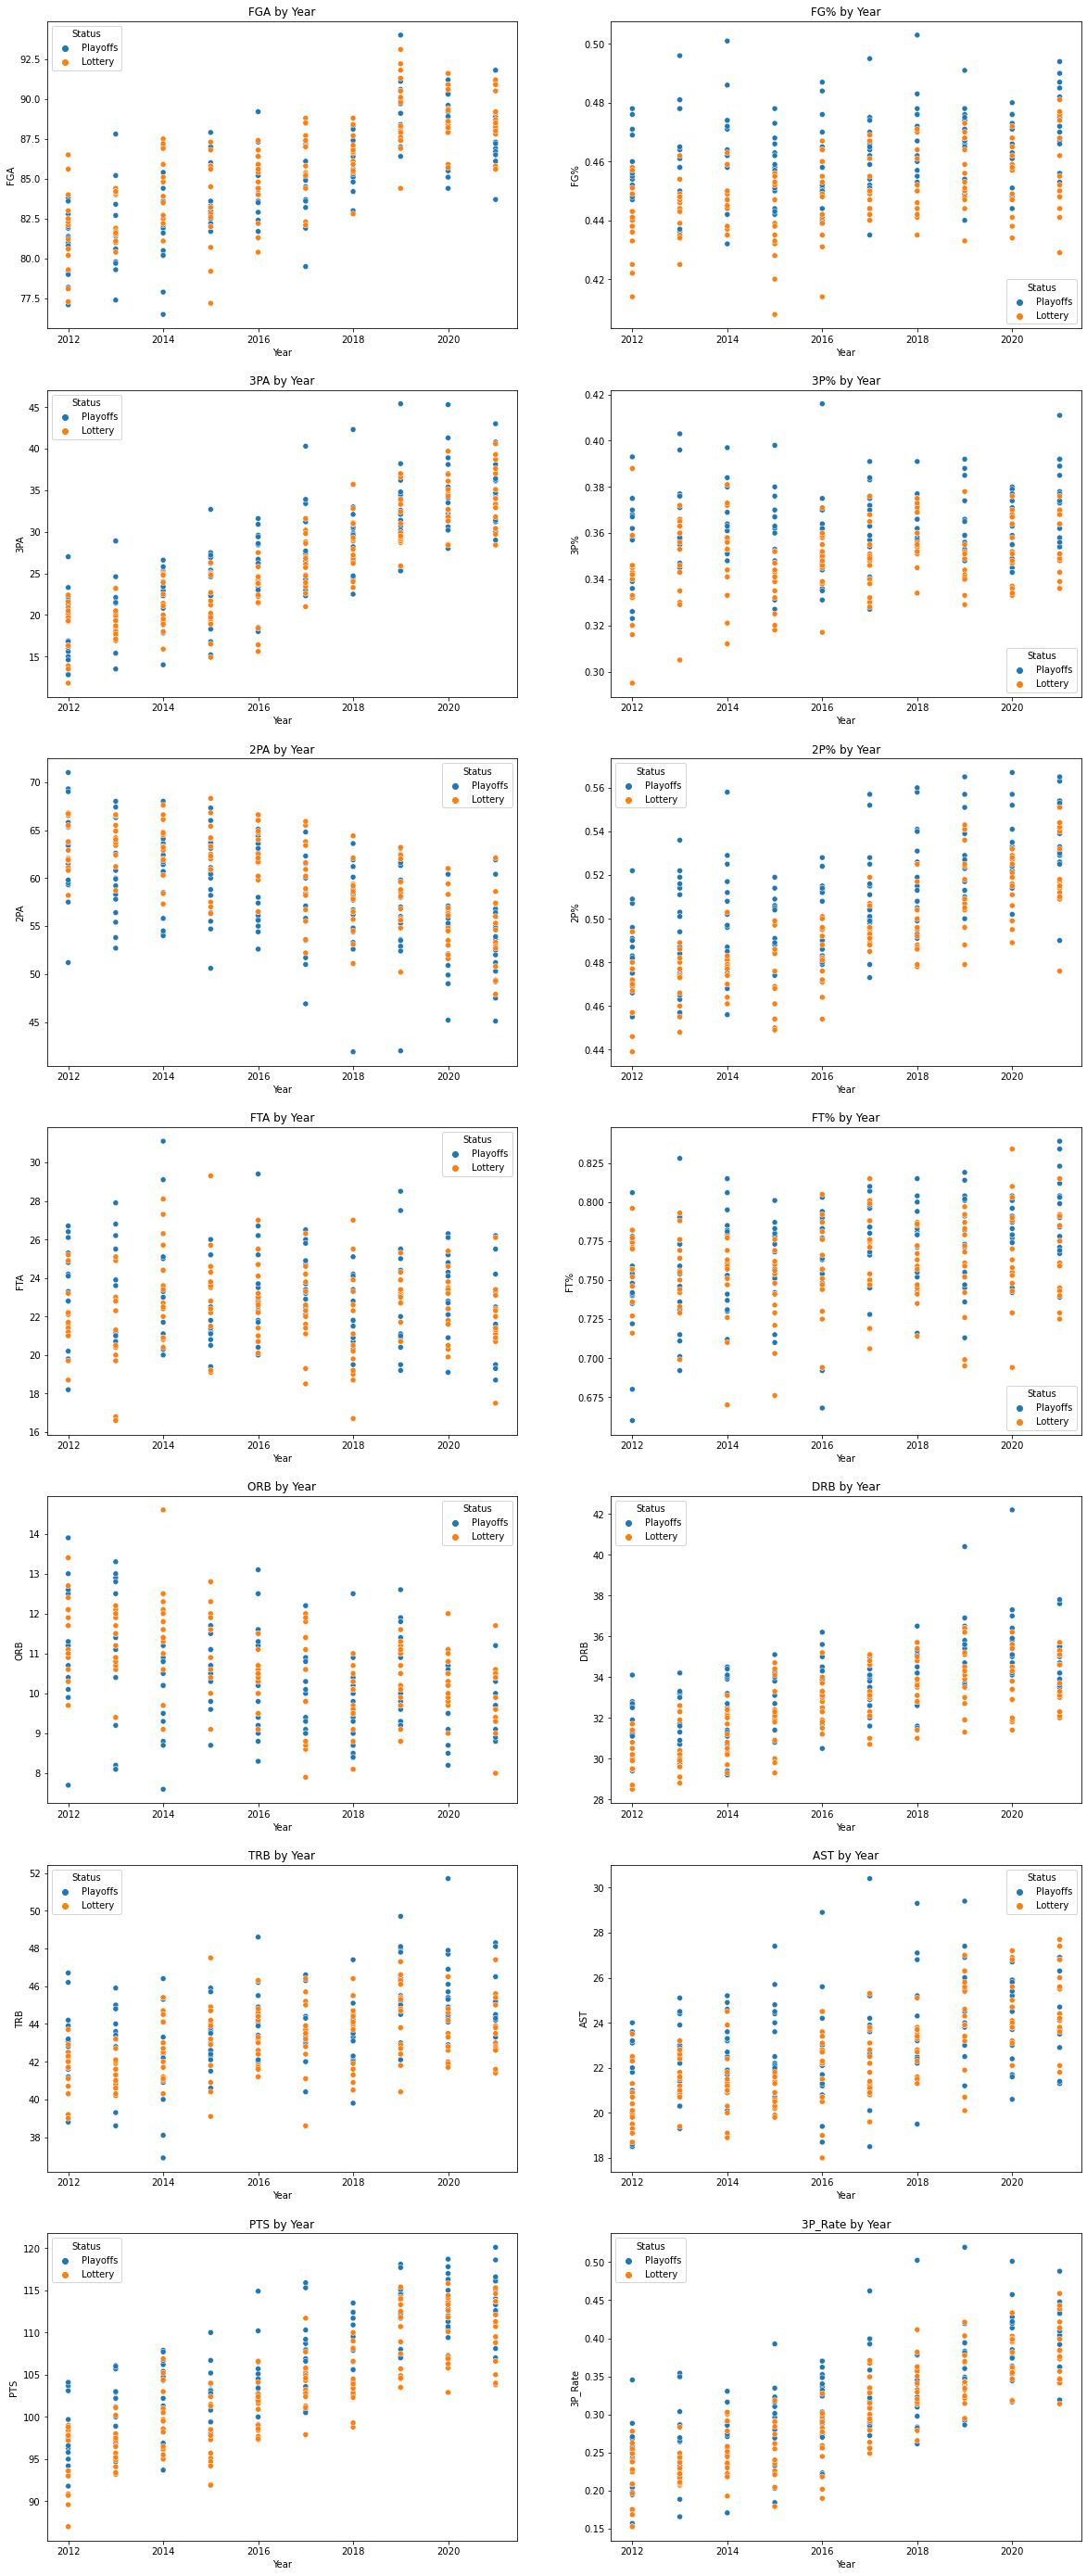

In [82]:
traditional_cols = ['FGA', 'FG%', '3PA', '3P%', '2PA', '2P%', 
      'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'PTS', '3P_Rate']

fig, axes = plt.subplots(7, 2, figsize=(20, 50))

for i in range(7):
    for j in range(2):
        index = 2 * i + j
        sns.scatterplot(ax=axes[i, j], 
                        data=nba_data, 
                        x='Year', 
                        y=traditional_cols[index], 
                        hue='Status')
        axes[i, j].title.set_text(f"{traditional_cols[index]} by Year")

plt.show()

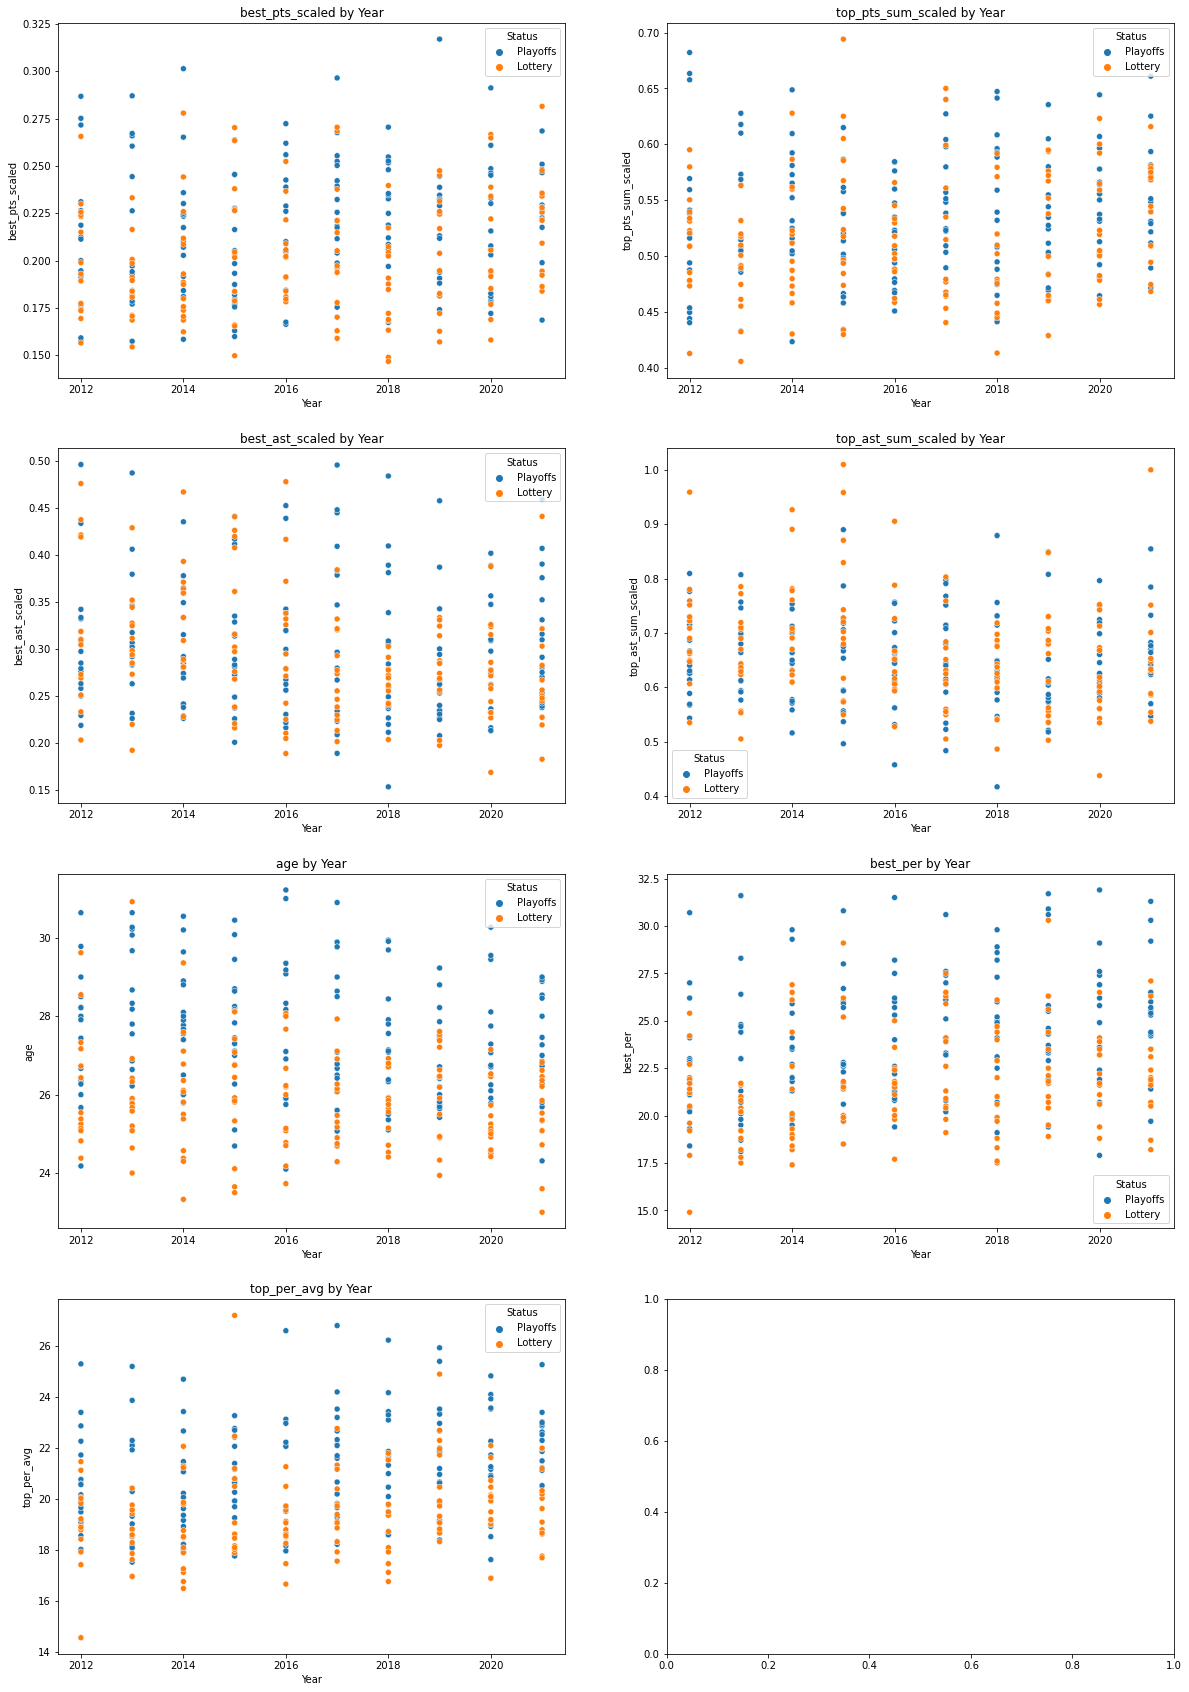

In [95]:
new_cols = ['best_pts_scaled', 'top_pts_sum_scaled', 'best_ast_scaled', 
            'top_ast_sum_scaled','age', 'best_per', 'top_per_avg']

fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        
        if index != 7:
            sns.scatterplot(ax=axes[i, j], 
                            data=nba_data, 
                            x='Year', 
                            y=new_cols[index], 
                            hue='Status')
            axes[i, j].title.set_text(f"{new_cols[index]} by Year")

plt.show()

In [84]:
corr_traditional = nba_data[traditional_cols].corrwith(nba_data['W/L%']).sort_values(
    key=lambda x : abs(x), ascending=False
)
corr_traditional = pd.DataFrame(corr_traditional)
corr_traditional.rename(columns={0: 'Correlation'}, inplace=True)
corr_traditional.head(8)

,Correlation
FG%,0.643295
3P%,0.559170
2P%,0.478336
PTS,0.364253
DRB,0.360060
AST,0.296048
TRB,0.290052
2PA,-0.223344


In [85]:
corr_new = nba_data[new_cols].corrwith(nba_data['W/L%']).sort_values(
    key=lambda x : abs(x), ascending=False
)
corr_new = pd.DataFrame(corr_new)
corr_new.rename(columns={0: 'Correlation'}, inplace=True)
corr_new

,Correlation
age,0.556333
top_per_avg,0.528084
best_per,0.506642
best_pts_scaled,0.263169
top_pts_sum_scaled,0.199411
top_ast_sum_scaled,-0.109791
best_ast_scaled,0.026159


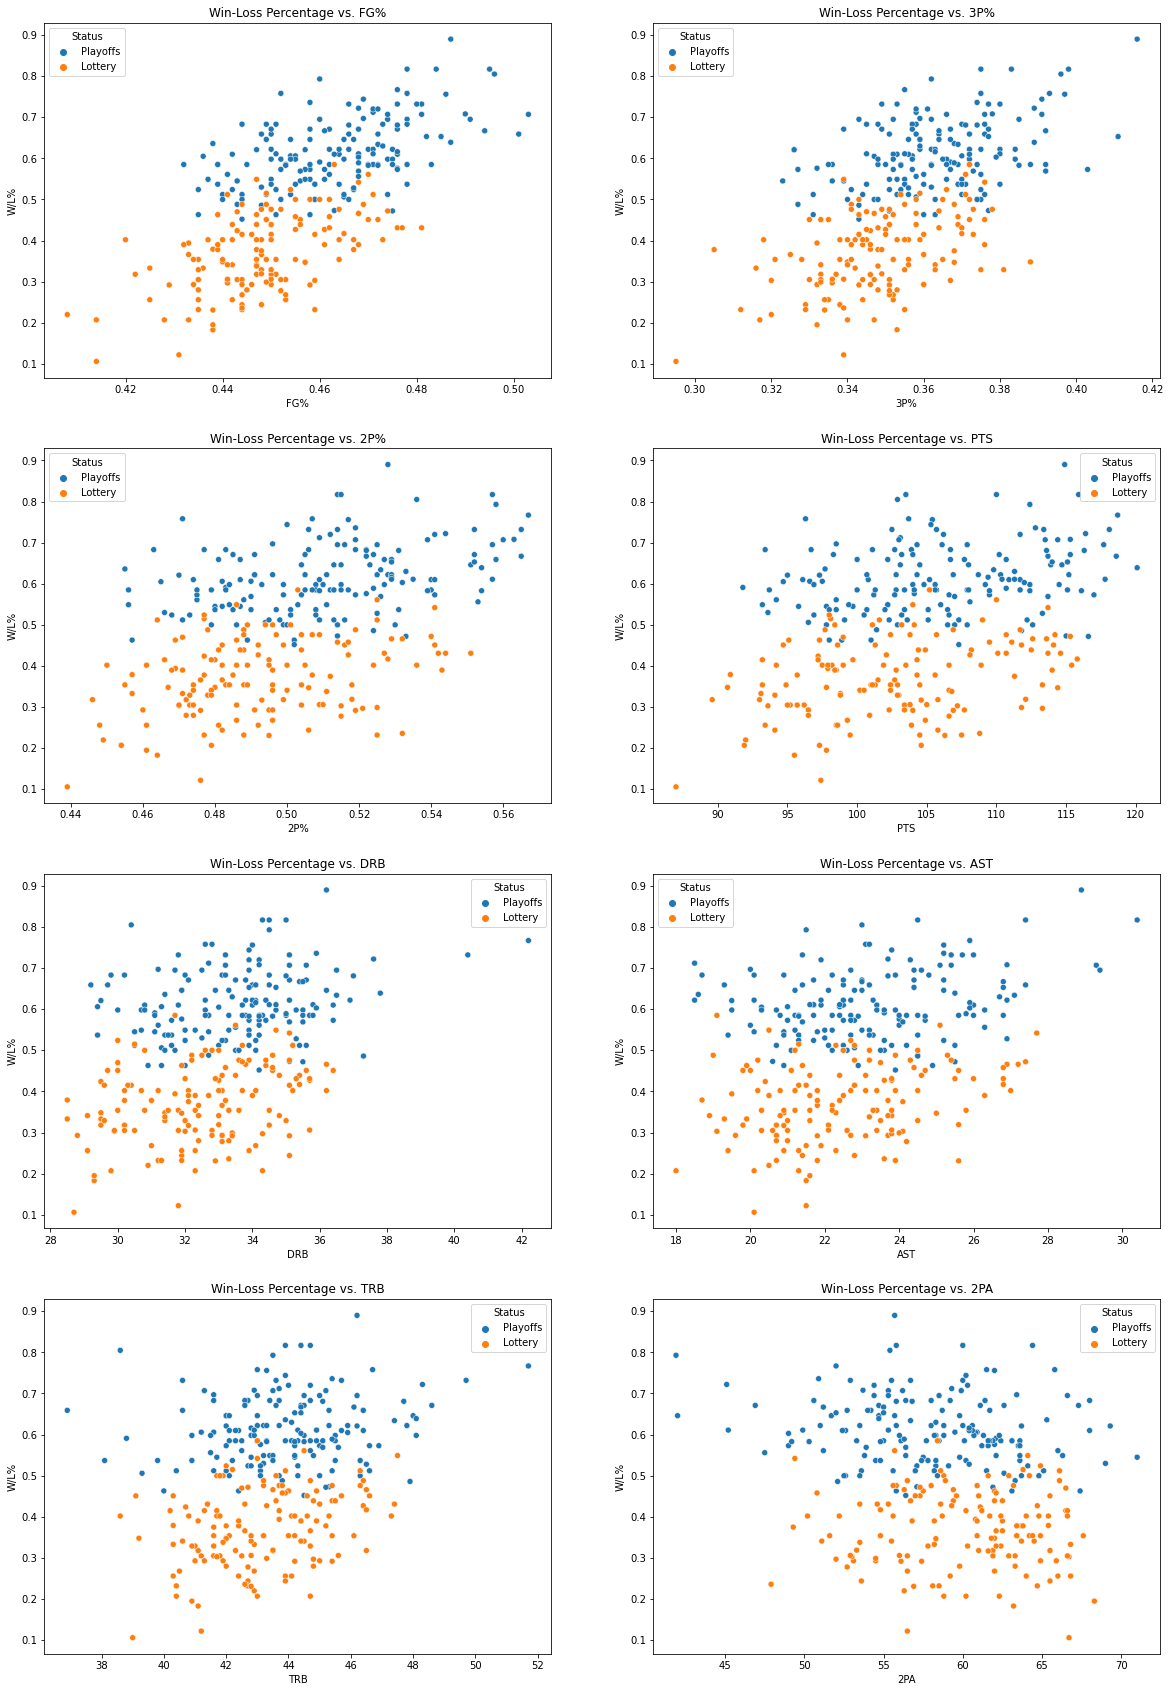

In [86]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        sns.scatterplot(ax=axes[i, j], 
                        data=nba_data, 
                        x=corr_traditional.index[index], 
                        y='W/L%', 
                        hue='Status')
        axes[i, j].title.set_text(f"Win-Loss Percentage vs. {corr_traditional.index[index]}")

plt.show()

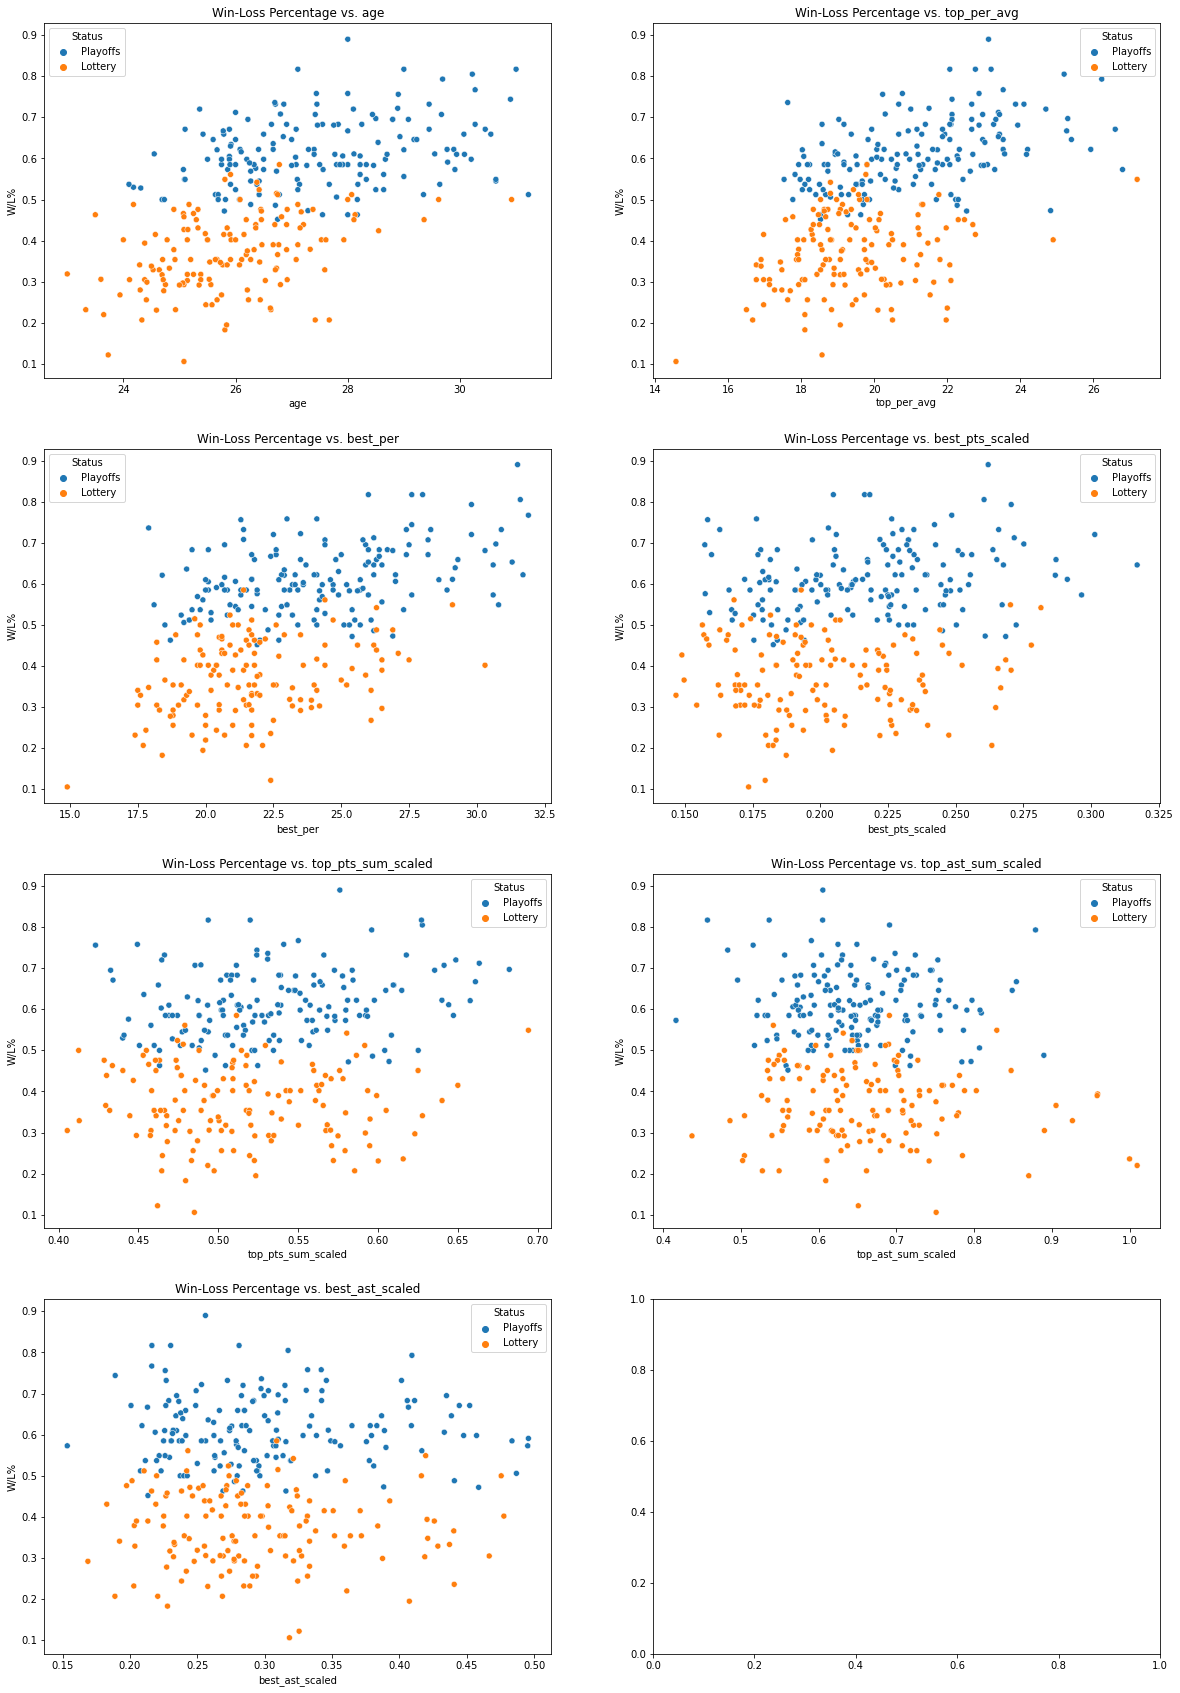

In [87]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        
        if index != 7:
            sns.scatterplot(ax=axes[i, j], 
                            data=nba_data, 
                            x=corr_new.index[index], 
                            y='W/L%', 
                            hue='Status')
            axes[i, j].title.set_text(f"Win-Loss Percentage vs. {corr_new.index[index]}")

plt.show()

# Part 3

## Task 0: EDA for Top Teams* + Computing/Visualizing Correlations

*Top Teams = top 25% in terms of win-loss percentage

In [97]:
corr_traditional = nba_data[traditional_cols].corrwith(nba_data['TopTeamThisYear?']).sort_values(
    key=lambda x : abs(x), ascending=False
)
corr_traditional = pd.DataFrame(corr_traditional)
corr_traditional.rename(columns={0: 'Correlation'}, inplace=True)
corr_traditional.head(8)

,Correlation
FG%,0.480580
2P%,0.421684
3P%,0.367204
PTS,0.298291
DRB,0.290729
2PA,-0.267963
TRB,0.210766
3P_Rate,0.202143


In [99]:
corr_new = nba_data[new_cols].corrwith(nba_data['TopTeamThisYear?']).sort_values(
    key=lambda x : abs(x), ascending=False
)
corr_new = pd.DataFrame(corr_new)
corr_new.rename(columns={0: 'Correlation'}, inplace=True)
corr_new

,Correlation
top_per_avg,0.476654
best_per,0.431825
age,0.384719
best_pts_scaled,0.286495
top_pts_sum_scaled,0.245027
top_ast_sum_scaled,-0.038960
best_ast_scaled,0.034618


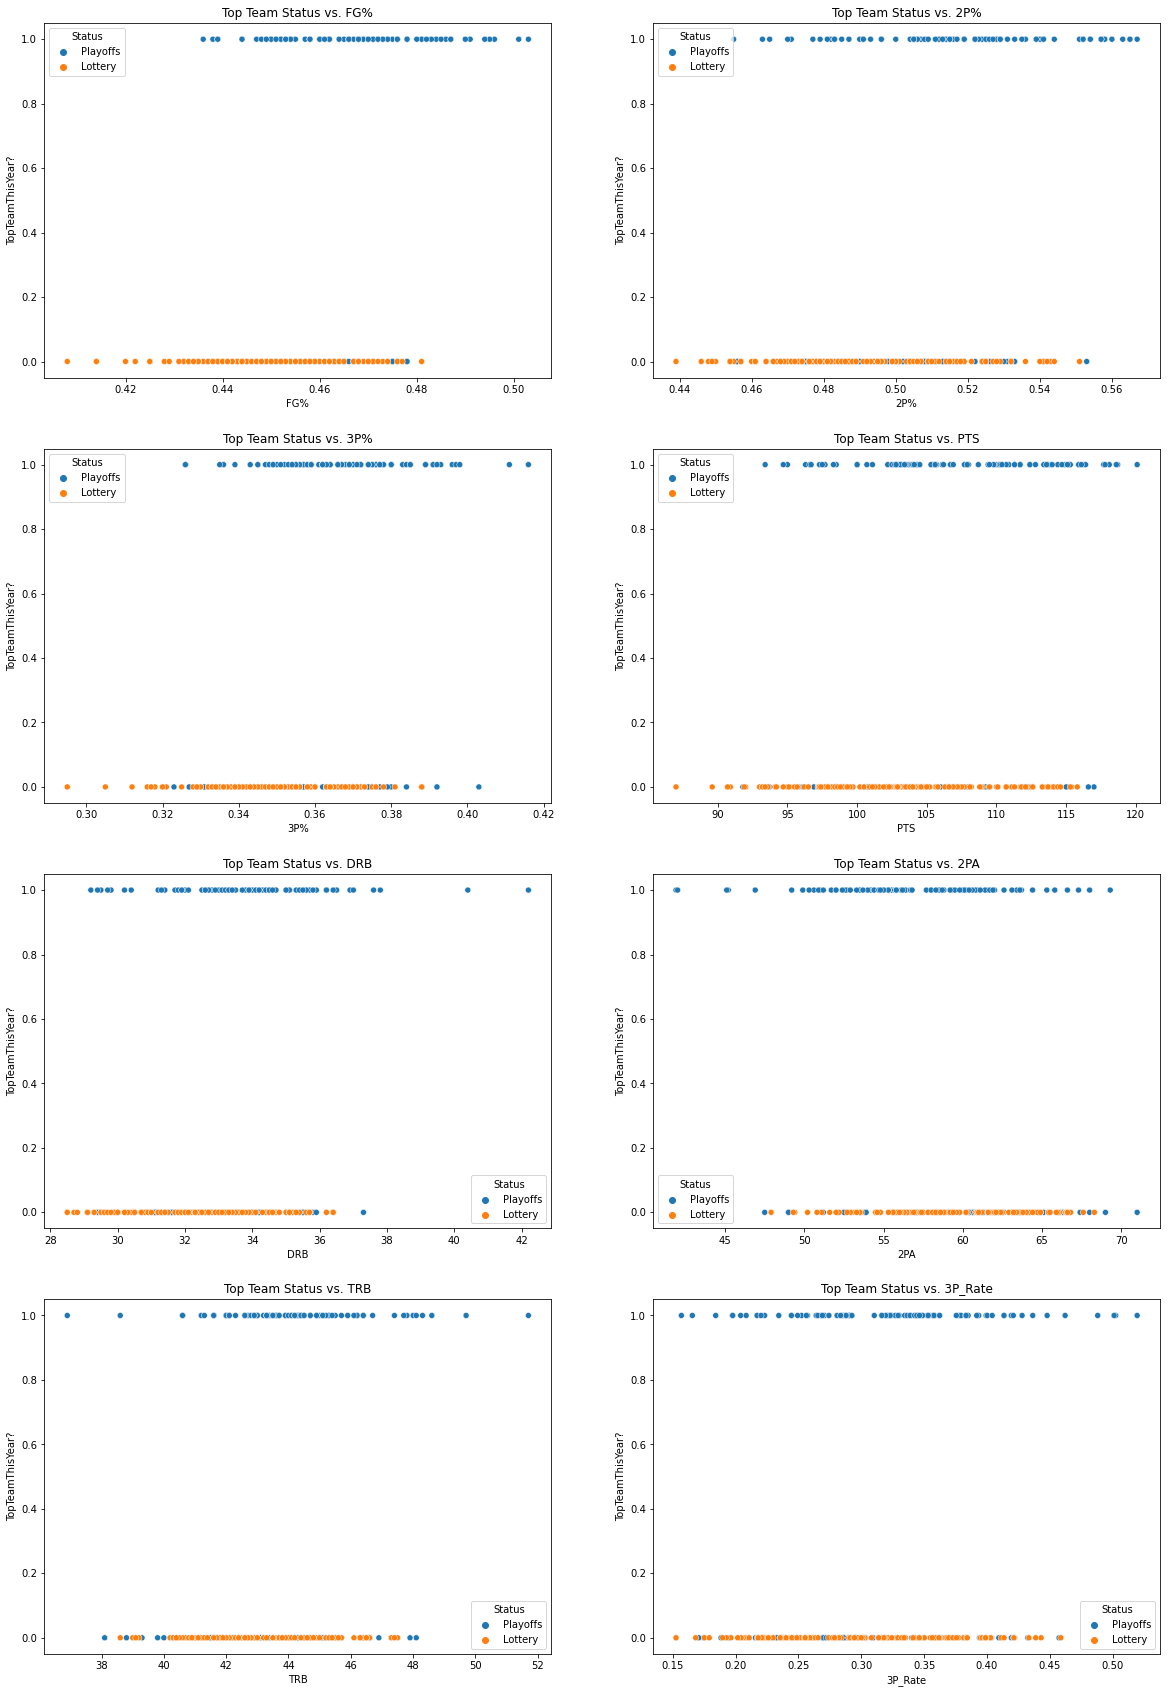

In [100]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        sns.scatterplot(ax=axes[i, j], 
                        data=nba_data, 
                        x=corr_traditional.index[index], 
                        y='TopTeamThisYear?', 
                        hue='Status')
        axes[i, j].title.set_text(f"Top Team Status vs. {corr_traditional.index[index]}")

plt.show()

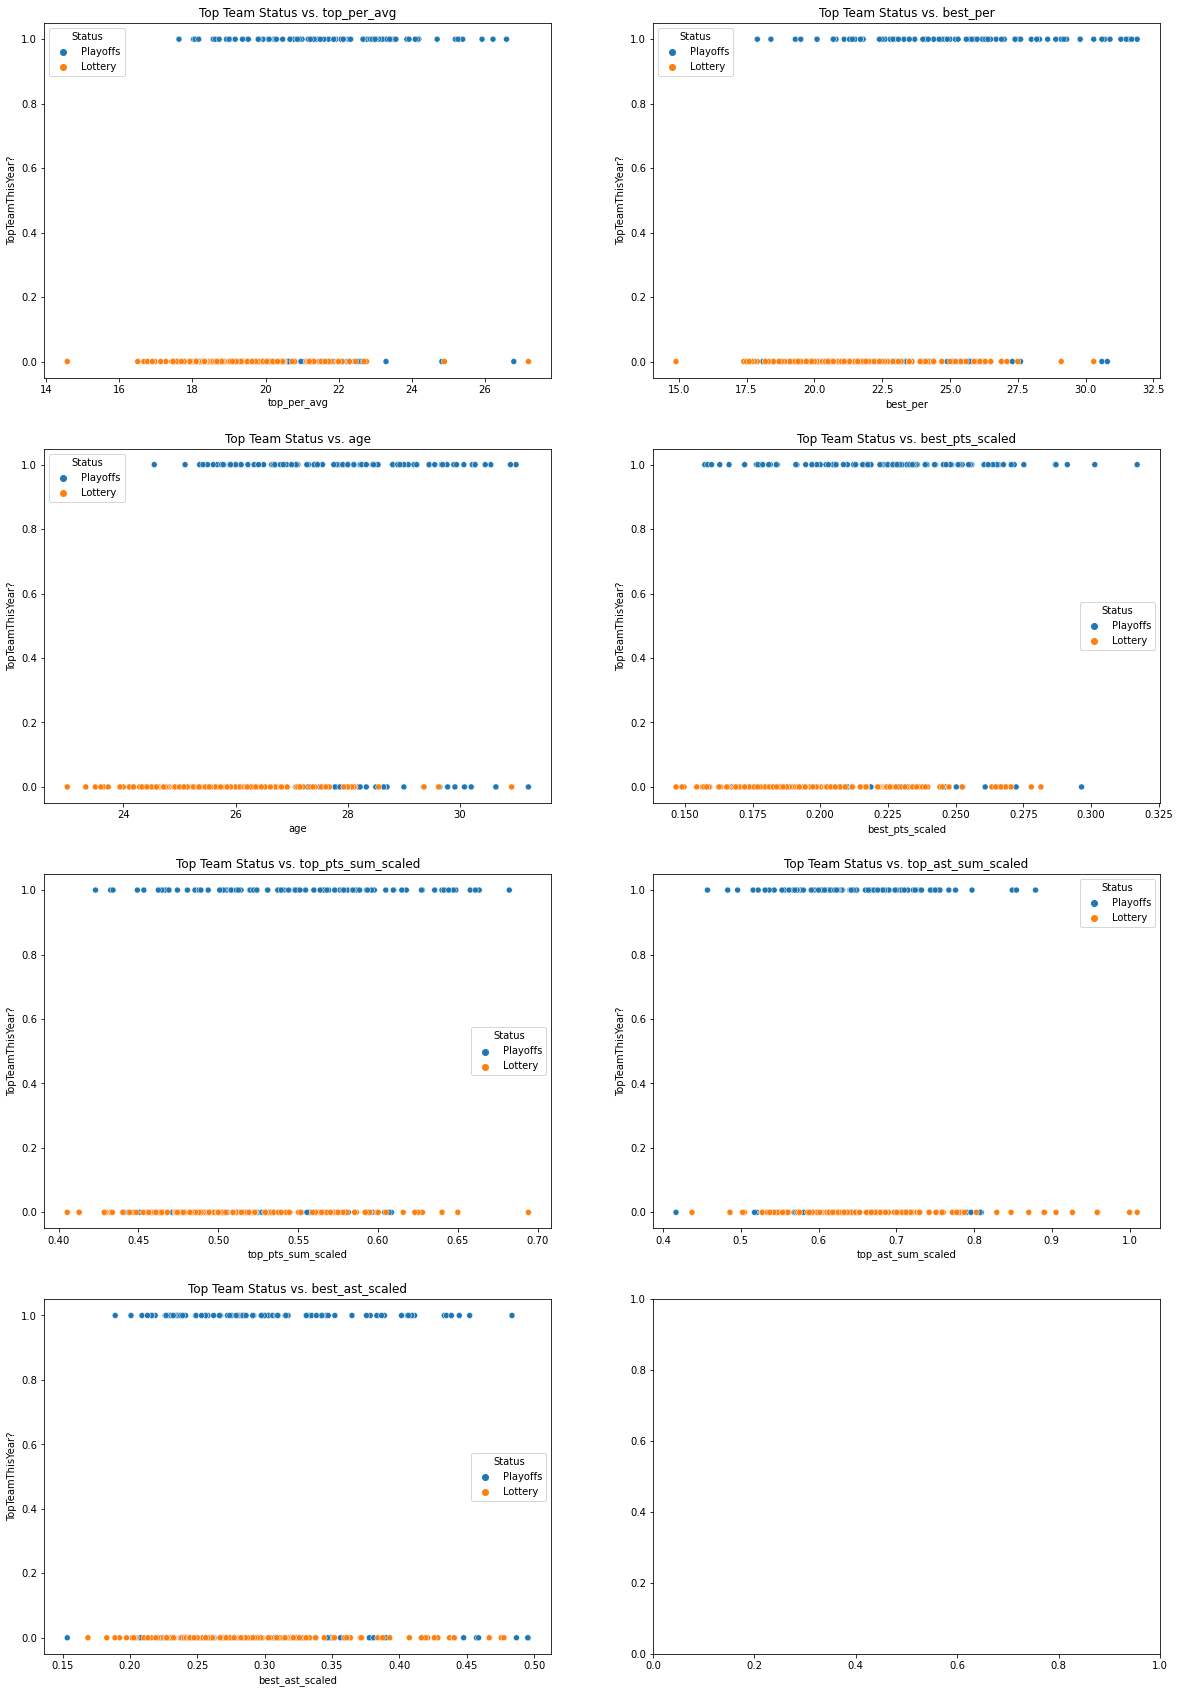

In [101]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

for i in range(4):
    for j in range(2):
        index = 2 * i + j
        
        if index != 7:
            sns.scatterplot(ax=axes[i, j], 
                            data=nba_data, 
                            x=corr_new.index[index], 
                            y='TopTeamThisYear?', 
                            hue='Status')
            axes[i, j].title.set_text(f"Top Team Status vs. {corr_new.index[index]}")

plt.show()

## Task 1: EDA and selecting the desired subset of the data 

First, we view the columns of the data.

In [88]:
nba_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Rk', 'Team', 'G', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W/L%',
       'Region', 'Year', '3P_Rate', 'TopTeamThisYear?', 'best_pts',
       'top_pts_sum', 'best_ast', 'top_ast_sum', 'best_per', 'top_per_avg',
       'age', 'Year_Bin', 'Status', 'best_pts_scaled', 'top_pts_sum_scaled',
       'best_ast_scaled', 'top_ast_sum_scaled'],
      dtype='object')

There are 27 different columns that can be plotted. In order to produce a meaningful pairplot for exploratory data analysis, we select the variables most correlated with win-loss ratio.

In [89]:
corr_gross = nba_data.corrwith(nba_data['W/L%'])
corr_gross.sort_values(ascending = False)

W/L%                  1.000000
TopTeamThisYear?      0.736341
FG%                   0.643295
Unnamed: 0.1          0.593252
3P%                   0.559170
age                   0.556333
top_per_avg           0.528084
best_per              0.506642
2P%                   0.478336
PTS                   0.364253
DRB                   0.360060
FG                    0.347883
best_pts              0.345319
top_pts_sum           0.324322
BLK                   0.309345
AST                   0.296048
TRB                   0.290052
best_pts_scaled       0.263169
3P                    0.233018
FT%                   0.199781
top_pts_sum_scaled    0.199411
FT                    0.193864
STL                   0.180856
3P_Rate               0.163646
3PA                   0.138322
best_ast              0.136960
FTA                   0.116970
2P                    0.085043
top_ast_sum           0.075580
MP                    0.054469
G                     0.043911
best_ast_scaled       0.026159
Year    

We find that the 4 variables most correlated with W/L% are Field Goal Percentage, 3-Point Field Goal Percentage, 2-Point Field Goal Percentage, and Points; 'TopTeamThisYear?' is not an explanatory variable of interest as it is only used to identify teams within the top 25% win-loss ratio annually.

In [90]:
nba_data[['W/L%', 'FG%','3P%','2P%', 'PTS']].corr()

,W/L%,FG%,3P%,2P%,PTS
W/L%,1.000000,0.643295,0.559170,0.478336,0.364253
FG%,0.643295,1.000000,0.600355,0.807179,0.618376
3P%,0.559170,0.600355,1.000000,0.374939,0.395114
2P%,0.478336,0.807179,0.374939,1.000000,0.857804
PTS,0.364253,0.618376,0.395114,0.857804,1.000000


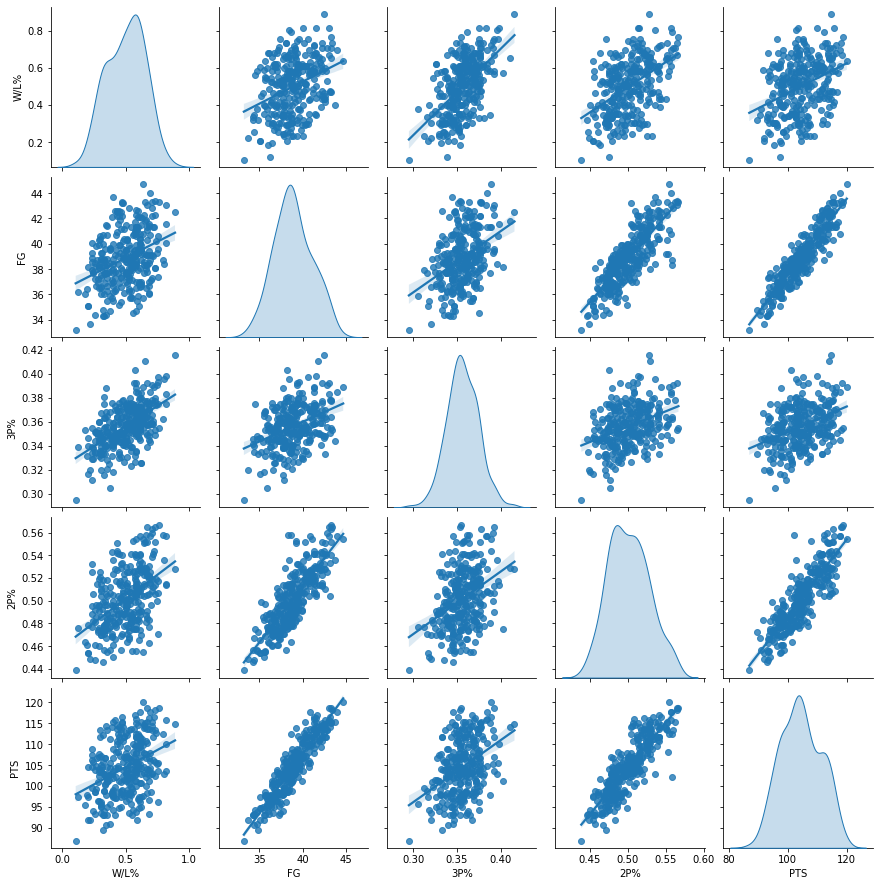

In [91]:
sns.pairplot(nba_data[['W/L%', 'FG','3P%','2P%','PTS']], kind = 'reg', diag_kind = 'kde')

There appears to be high multicollinearity (more/less than 0.5 or -0.5) between 'FG%' and the other 3 variables. Therefore we will be focusing on 'FG%', the variable most correlated with 'W/L%'.

From the pairplot, it appears that the data are normally distributed. As expected from the correlation grid, the explanatory variables are highly correlated with each other, some moreso than their correlation with 'W/L%'. This makes sense as 2-Point Field Goals and 3-Point Field Goals are simply categories of Field Goals, and Points are gained from Field Goals.

# Task 2: Hypothesis testing and validating trends

Is the mean field goal percentage significantly higher in the top 25% of teams by win percentage compared to the bottom 75% in 2021?

In [92]:
from scipy import stats
nba_data_top_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == True) & (nba_data['Year'] == 2021)]
nba_data_bottom_wins_2021 = nba_data[(nba_data['TopTeamThisYear?'] == False) & (nba_data['Year'] == 2021)]
stats.ttest_ind(nba_data_top_wins_2021['FG%'], nba_data_bottom_wins_2021['FG%'])

Ttest_indResult(statistic=3.328065311813287, pvalue=0.0024574525484994535)

In [93]:
top_mean = nba_data_top_wins_2021['FG%'].mean()
bottom_mean = nba_data_bottom_wins_2021['FG%'].mean()
print("Mean FG% for teams in top 25% of W/L%:", top_mean)
print("Mean FG% for teams in bottom 75% of W/L%:", bottom_mean)
print("Difference in means:", top_mean - bottom_mean)

Mean FG% for teams in top 25% of W/L%: 0.4776999999999999
Mean FG% for teams in bottom 75% of W/L%: 0.4602500000000001
Difference in means: 0.0174499999999998


Yes, there appears to be a significant difference in the field goal percentage between the best teams and the rest of them. This implies that it is important to make one's shots count, not just getting the most points by shooting often.

Does this difference appear to hold between the top and bottom teams in the east and west annually?

Text(0.5, 1.02, 'Field Goal Percentage by Year and Win Percentage')

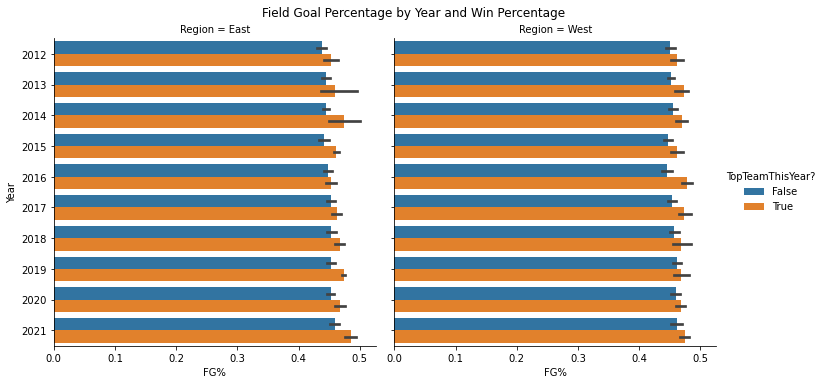

In [94]:
sns.catplot(x='FG%', y='Year', hue='TopTeamThisYear?', col='Region', data=nba_data, kind='bar', orient='h')
plt.suptitle('Field Goal Percentage by Year and Win Percentage', y=1.02)

Although the difference may seem insignificant at first, there is a consistent trend of a higher Field Goal Percentage for teams in the top 25% of Win/Loss Percentage, for each year and region; note that a significant difference was found in 2021 with a mean difference of about 1.7%.